In [ ]:
#MLHomework 6
#Matthew Ewert
#801232199
#

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Time: 10.24 seconds
Validation Loss (MSE): 0.0249
Validation MAE: 0.1224
Validation RMSE: 2968319.2258


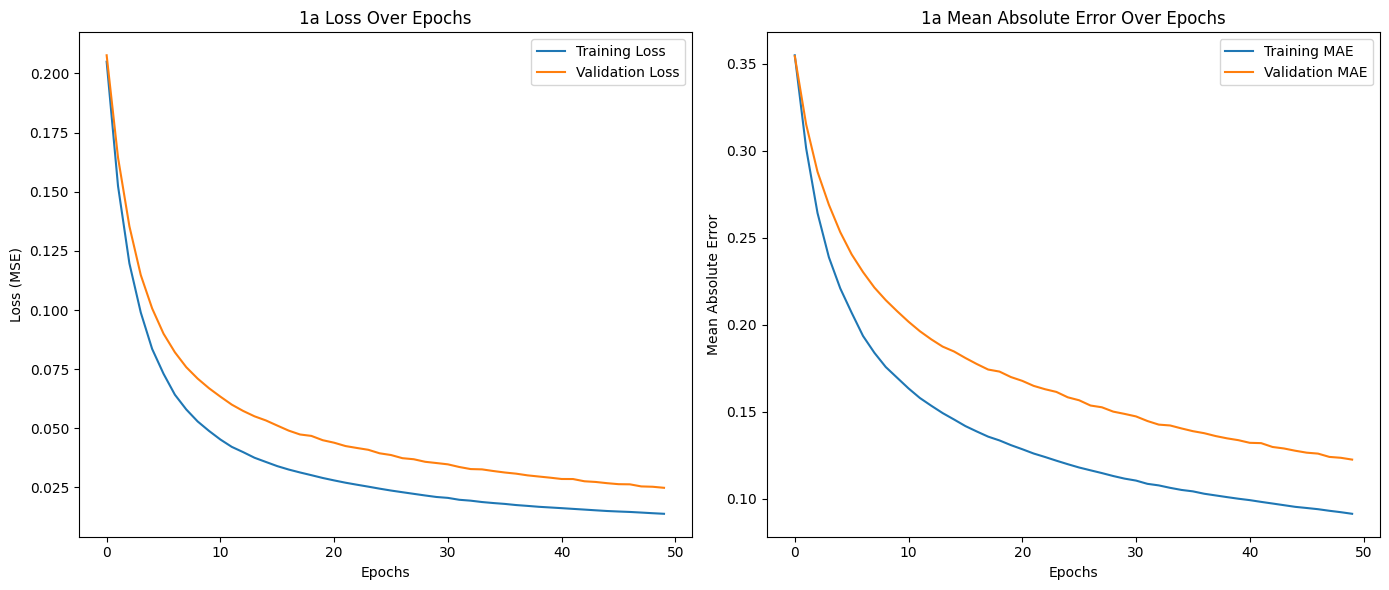

In [ ]:
#Problem 1A
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import time

file_path = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
data = pd.read_csv(file_path)

target_column = "price"  # Target variable
X = data.drop(columns=[target_column])
y = data[target_column].values

# Identify Categorical and Numerical Columns
categorical_columns = X.select_dtypes(include=["object"]).columns
numerical_columns = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),  # Standardize numerical columns
        ("cat", OneHotEncoder(drop="first"), categorical_columns)  # One-hot encode categorical columns
    ]
)

# Split Data into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Feature Preprocessing
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

# Scale Target
scaler_y = MinMaxScaler()  # Scale target values to range [0, 1]
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))

# Build Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 8 nodes
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the Model
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)  # Suppress epoch-by-epoch output
training_time = time.time() - start_time

# Evaluate the Model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)

# Make Predictions
y_pred_scaled = model.predict(X_val)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Rescale predictions back to original scale
rmse = np.sqrt(np.mean((scaler_y.inverse_transform(y_val) - y_pred.flatten())**2))

# Print Metrics
print(f"Training Time: {training_time:.2f} seconds")
print(f"Validation Loss (MSE): {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

# Final Summary Plots
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('1a Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('1a Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Time: 9.58 seconds
Validation Loss (MSE): 0.0147
Validation MAE: 0.0929
Validation RMSE: 2781339.7251


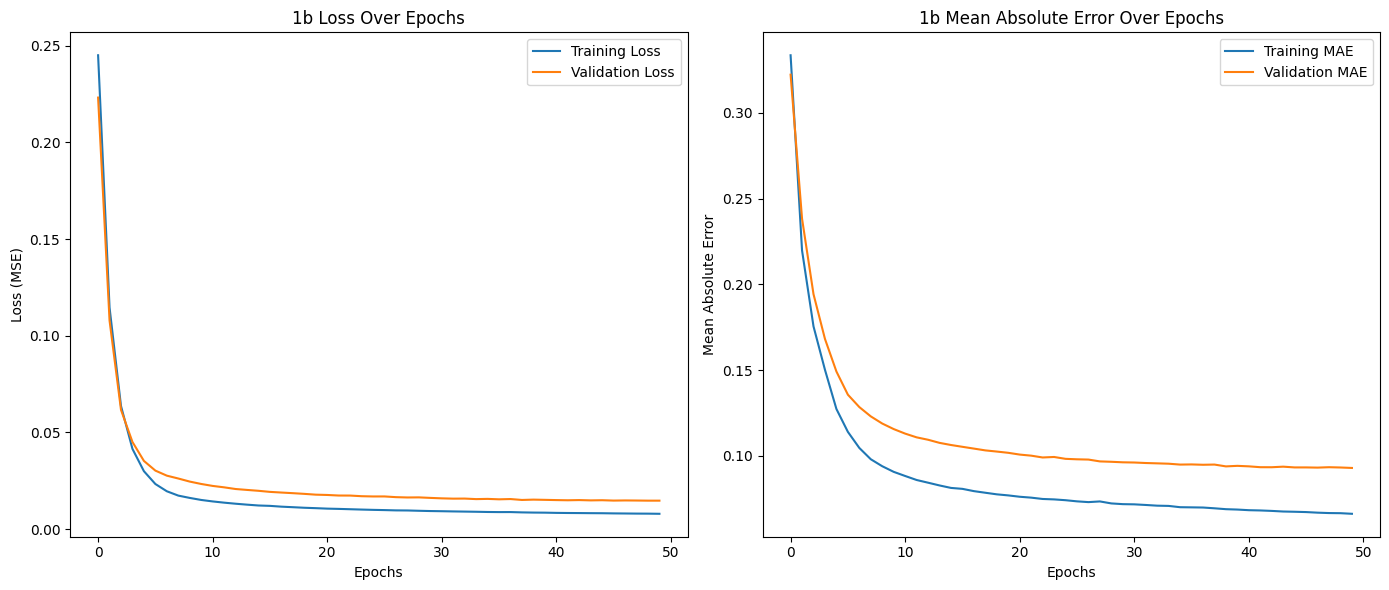

In [ ]:
# Problem 1B
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import time

file_path = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv"
data = pd.read_csv(file_path)

target_column = "price"
X = data.drop(columns=[target_column])
y = data[target_column].values

categorical_columns = X.select_dtypes(include=["object"]).columns
numerical_columns = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns)
    ]
)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))

# Updated Neural Network Model with Three Hidden Layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(8, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(4, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1)  # Output layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)
training_time = time.time() - start_time

val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)

y_pred_scaled = model.predict(X_val)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
rmse = np.sqrt(np.mean((scaler_y.inverse_transform(y_val) - y_pred.flatten())**2))

print(f"Training Time: {training_time:.2f} seconds")
print(f"Validation Loss (MSE): {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")
print(f"Validation RMSE: {rmse:.4f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('1b Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('1b Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Training Time: 7.93 seconds
Validation Loss: 0.0562
Validation Accuracy: 0.9825
Precision: 0.9726
Recall: 1.0000
F1 Score: 0.9861


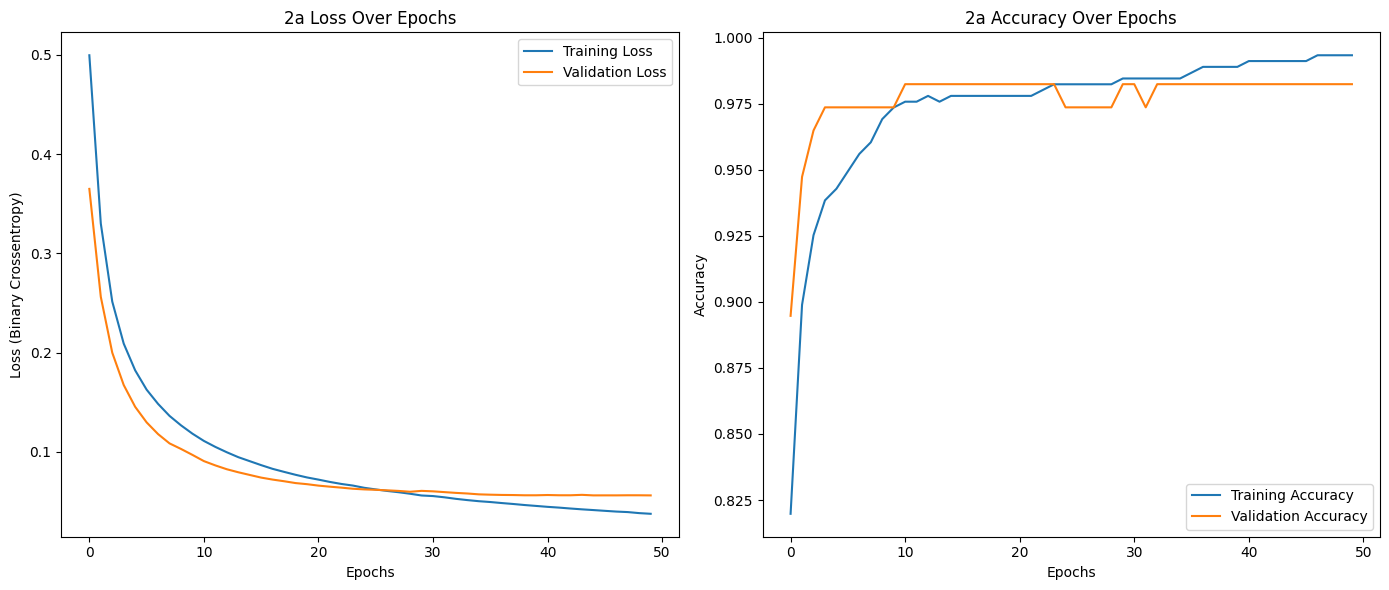

In [2]:
# Problem 2A
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time

# Load the Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)
training_time = time.time() - start_time

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('2a Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('2a Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Training Time: 13.31 seconds
Validation Loss: 0.1133
Validation Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


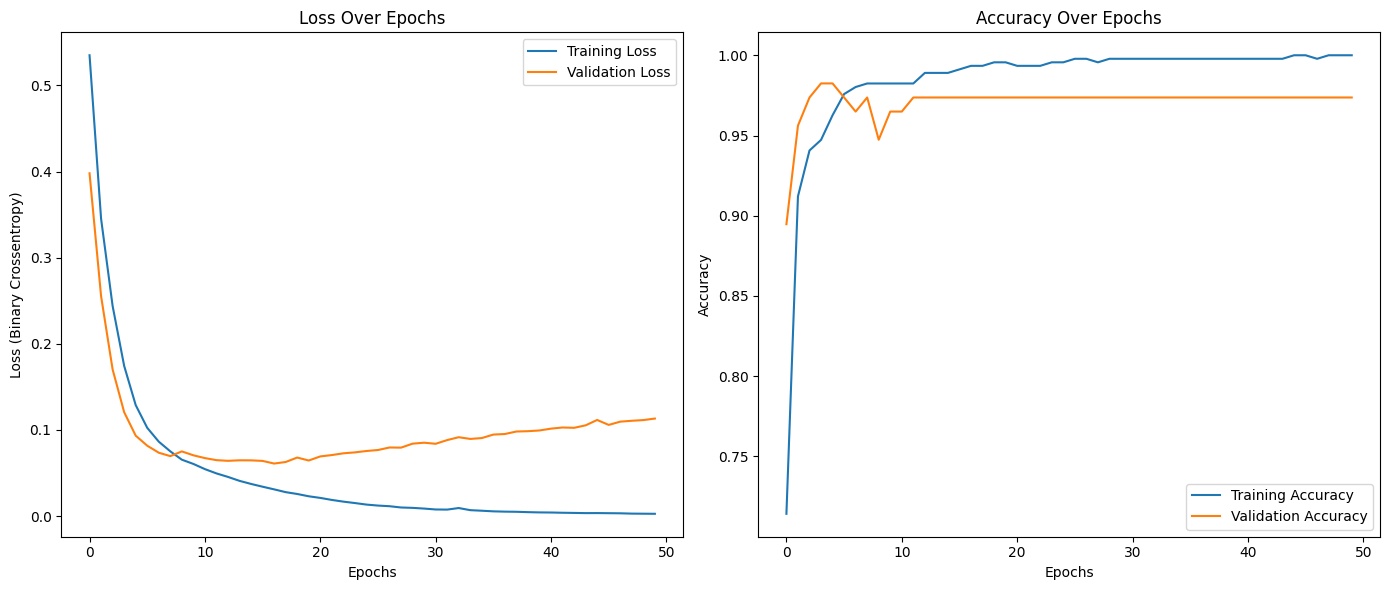

In [ ]:
# Problem 2B
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import time

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(16, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=0)
training_time = time.time() - start_time

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Training Time: {training_time:.2f} seconds")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Training Time: 900.34 seconds
Validation Loss: 1.5540
Validation Accuracy: 0.4875

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.48      0.53      1000
           1       0.62      0.56      0.59      1000
           2       0.39      0.40      0.40      1000
           3       0.34      0.30      0.32      1000
           4       0.40      0.49      0.44      1000
           5       0.41      0.38      0.40      1000
           6       0.46      0.63      0.53      1000
           7       0.64      0.42      0.50      1000
           8       0.55      0.68      0.61      1000
           9       0.56      0.53      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



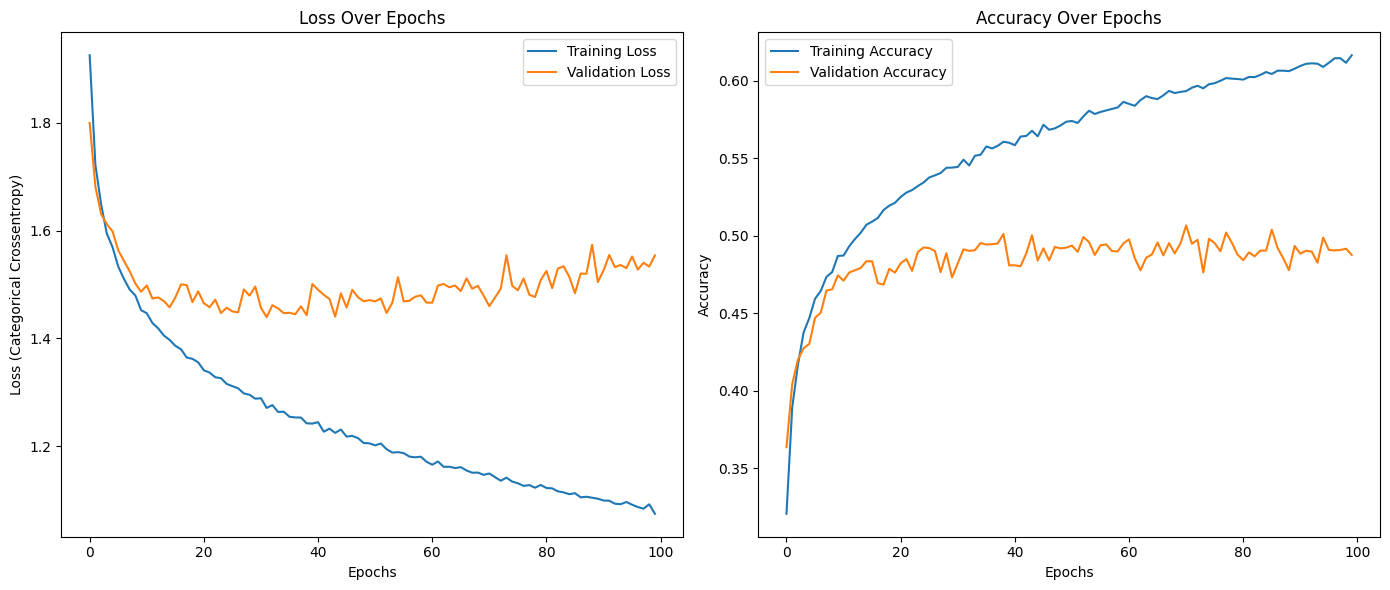

In [1]:
# Problem 3A
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import time

# Load the CIFAR-10 Dataset
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

# Normalize Pixel Values
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Flatten Images
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

# Convert Labels to One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

# Build Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 256 nodes
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, verbose=0)
training_time = time.time() - start_time

# Evaluate the Model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Classification Report
print("Training Time: {:.2f} seconds".format(training_time))
print("Validation Loss: {:.4f}".format(val_loss))
print("Validation Accuracy: {:.4f}".format(val_accuracy))
print("\nClassification Report:")
print(classification_report(y_val_classes, y_pred_classes))

# Plot Training and Validation Loss/Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ea Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('3a Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Training Time: 1797.45 seconds
Validation Loss: 3.4674
Validation Accuracy: 0.4969

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1000
           1       0.65      0.57      0.61      1000
           2       0.40      0.37      0.38      1000
           3       0.33      0.34      0.33      1000
           4       0.43      0.44      0.43      1000
           5       0.39      0.37      0.38      1000
           6       0.52      0.58      0.55      1000
           7       0.57      0.53      0.55      1000
           8       0.61      0.59      0.60      1000
           9       0.54      0.60      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



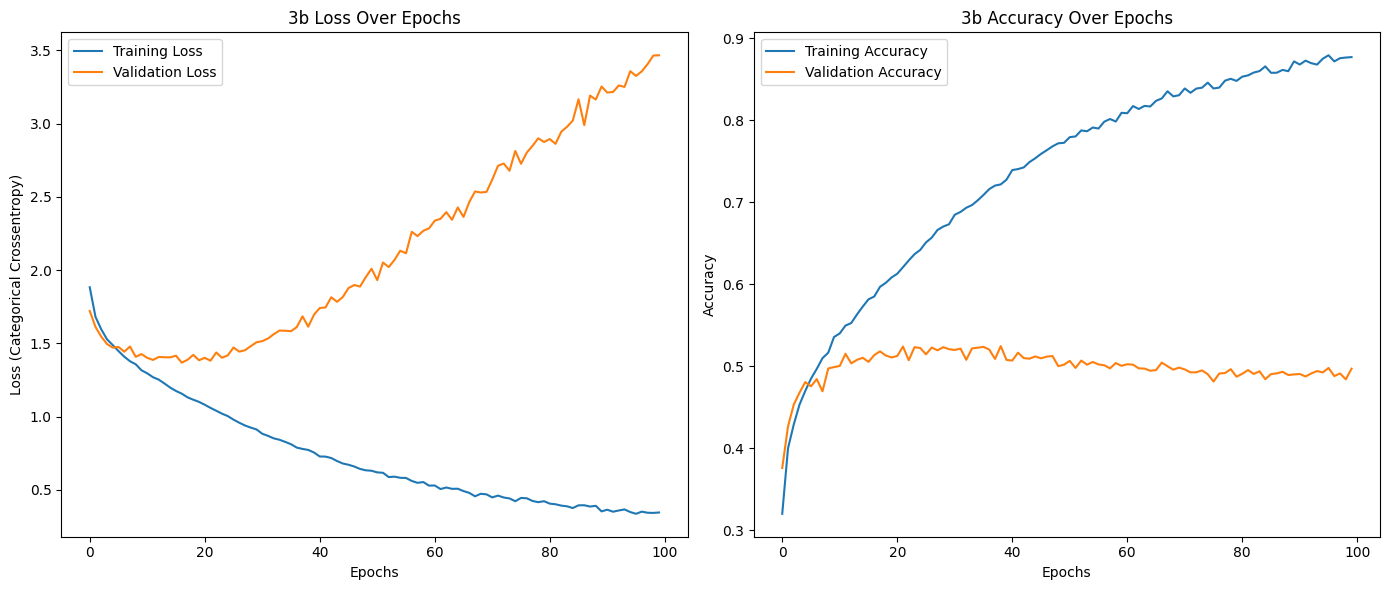

In [3]:
# Problem 3B
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import time

# Load the CIFAR-10 Dataset
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

# Normalize Pixel Values
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Flatten Images
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

# Convert Labels to One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

# Build Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    tf.keras.layers.Dense(256, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(128, activation='relu'),  # Third hidden layer
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
start_time = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128, verbose=0)
training_time = time.time() - start_time

# Evaluate the Model
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Classification Report
print("Training Time: {:.2f} seconds".format(training_time))
print("Validation Loss: {:.4f}".format(val_loss))
print("Validation Accuracy: {:.4f}".format(val_accuracy))
print("\nClassification Report:")
print(classification_report(y_val_classes, y_pred_classes))

# Plot Training and Validation Loss/Accuracy
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('3b Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Categorical Crossentropy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('3b Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
